In [377]:
data(economics, package="ggplot2")  # load data
economics$index <- 1:nrow(economics)  # create index variable
#economics <- economics[1:80, ]  # retail 80rows for better graphical understanding
loessMod10 <- loess(uempmed ~ index, data=economics, span=0.10) # 10% smoothing span
loessMod25 <- loess(uempmed ~ index, data=economics, span=0.25) # 25% smoothing span
loessMod50 <- loess(uempmed ~ index, data=economics, span=0.50) # 50% smoothing span

In [378]:
smoothed10 <- predict(loessMod10) 
smoothed25 <- predict(loessMod25) 
smoothed50 <- predict(loessMod50) 

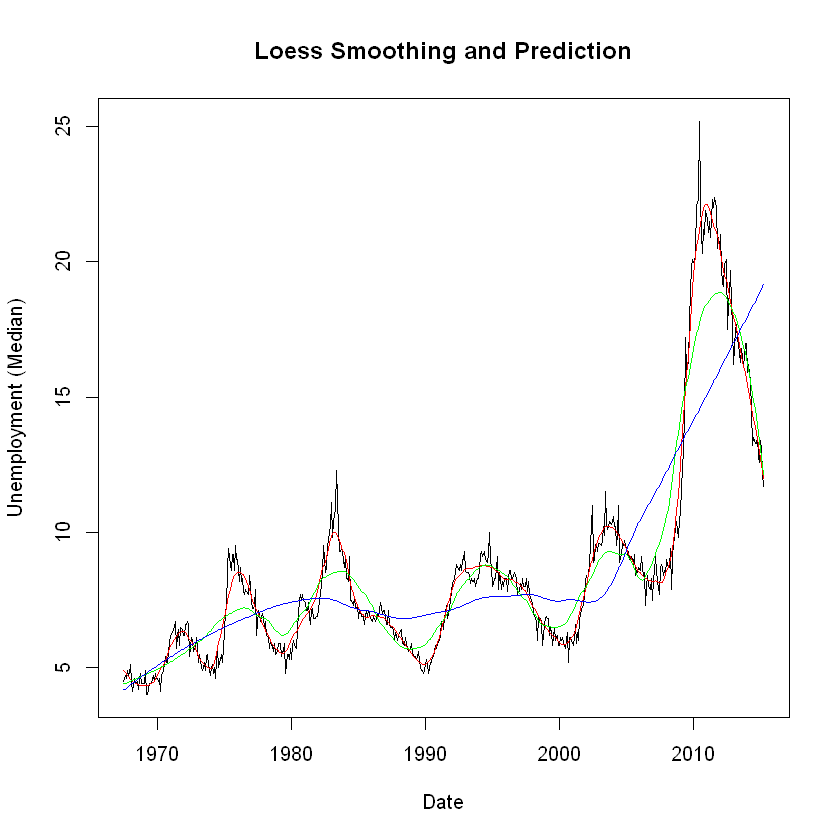

In [379]:
plot(economics$uempmed, x=economics$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(smoothed10, x=economics$date, col="red")
lines(smoothed25, x=economics$date, col="green")
lines(smoothed50, x=economics$date, col="blue")

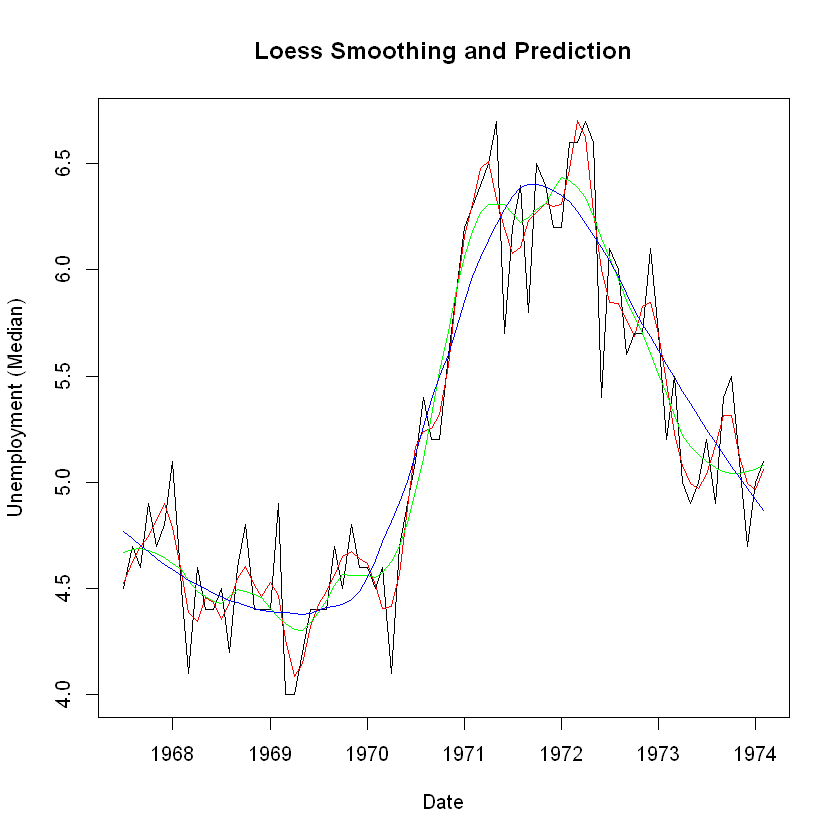

In [380]:
economics <- economics[1:80, ] 
loessMod10 <- loess(uempmed ~ index, data=economics, span=0.10) # 10% smoothing span
loessMod25 <- loess(uempmed ~ index, data=economics, span=0.25) # 25% smoothing span
loessMod50 <- loess(uempmed ~ index, data=economics, span=0.50) # 50% smoothing span
smoothed10 <- predict(loessMod10) 
smoothed25 <- predict(loessMod25) 
smoothed50 <- predict(loessMod50) 
plot(economics$uempmed, x=economics$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(smoothed10, x=economics$date, col="red")
lines(smoothed25, x=economics$date, col="green")
lines(smoothed50, x=economics$date, col="blue")

In [381]:
sum((loessMod10$residuals)^2)

sum((loessMod25$residuals)^2)

sum((loessMod50$residuals)^2)


[1] 2.875503

[1] 4.840499

[1] 6.472156

In [384]:
start<-1E12
index=0
for (x in 10:100){
  loessMod <- loess(uempmed ~ index, data=economics, span=x/100, degree=2)
  res <- (loessMod$residuals)
  sse<-sum(res^2)
if (sse<start){
    start<-sse
    index=x/100
}
    }
sse
index

[1] 12.52881

[1] 0.1

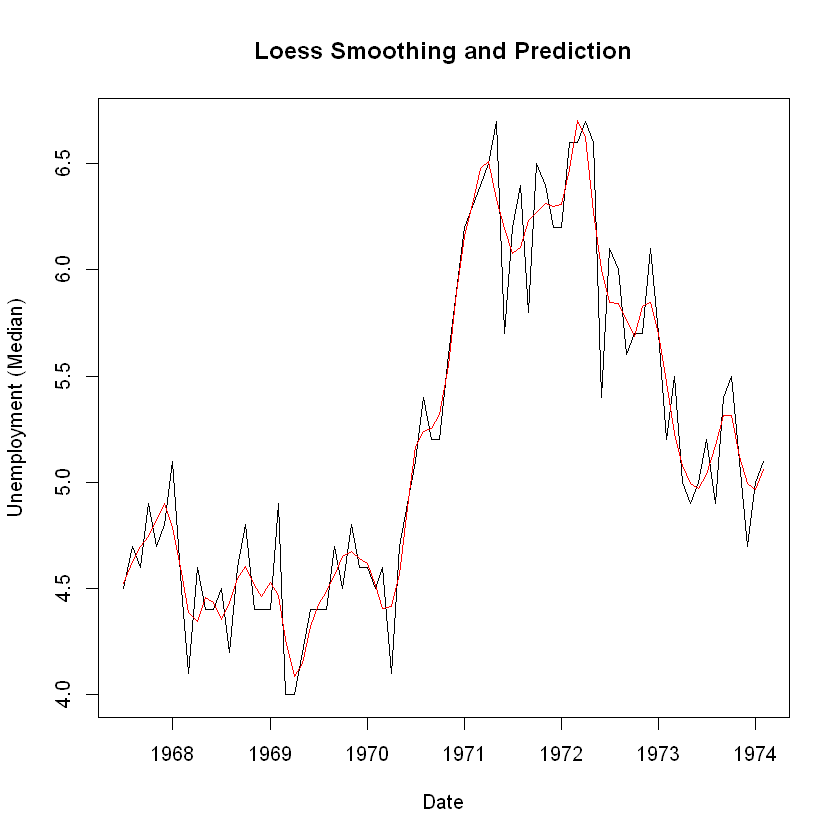

In [385]:
loessModbest <- loess(uempmed ~ index, data=economics, span=0.1) # 10% smoothing span
smoothedbest <- predict(loessModbest)
plot(economics$uempmed, x=economics$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(smoothedbest, x=economics$date, col="red")


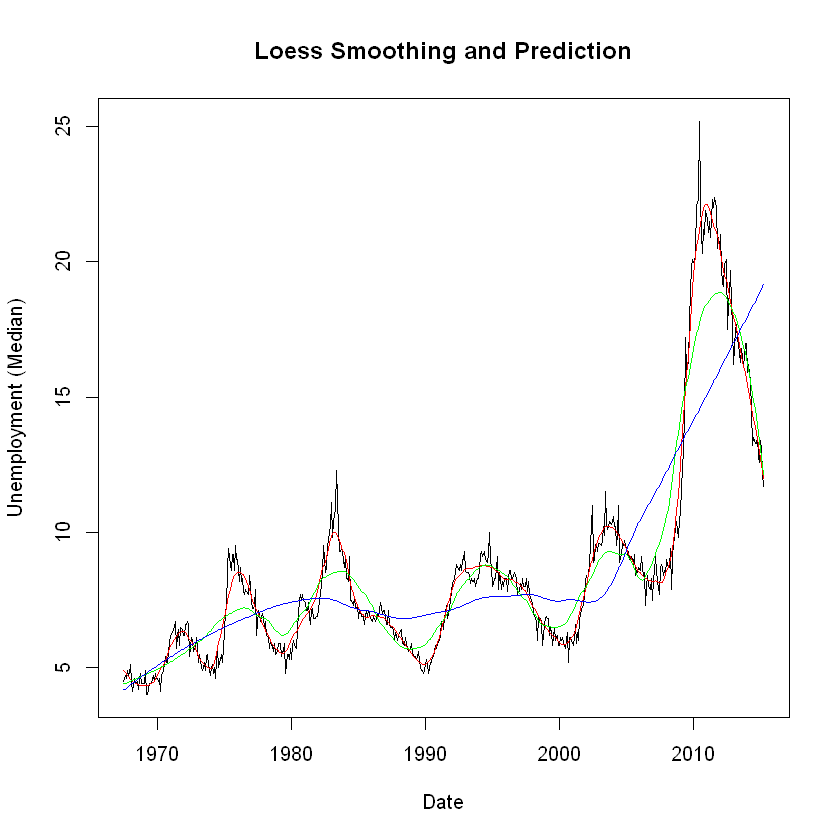

In [386]:
data(economics, package="ggplot2")  # load data
economics$index <- 1:nrow(economics)  # create index variable
loessMod10 <- loess(uempmed ~ index, data=economics, span=0.10) # 10% smoothing span
loessMod25 <- loess(uempmed ~ index, data=economics, span=0.25) # 25% smoothing span
loessMod50 <- loess(uempmed ~ index, data=economics, span=0.50) # 50% smoothing span
smoothed10 <- predict(loessMod10) 
smoothed25 <- predict(loessMod25) 
smoothed50 <- predict(loessMod50) 
plot(economics$uempmed, x=economics$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(smoothed10, x=economics$date, col="red")
lines(smoothed25, x=economics$date, col="green")
lines(smoothed50, x=economics$date, col="blue")

In [387]:

start<-1E12
index=0
for (x in 2:100){
  loessMod <- loess(uempmed ~ index, data=economics, span=x/100, degree=2)
  res <- (loessMod$residuals)
  sse<-sum(res^2)
if (sse<start){
    start<-sse
    index=x/100
}
    }
sse
index

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 574"

[1] 3135.947

[1] 0.02

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 574"

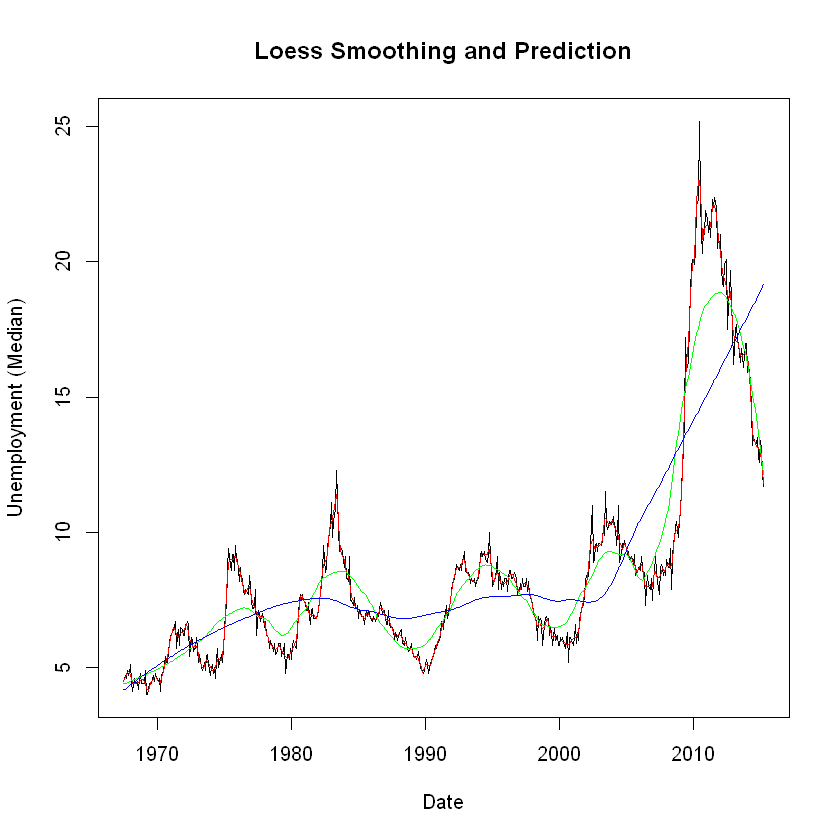

In [388]:
data(economics, package="ggplot2")  # load data
economics$index <- 1:nrow(economics)  # create index variable
loessMod2 <- loess(uempmed ~ index, data=economics, span=0.020) # 10% smoothing span
loessMod25 <- loess(uempmed ~ index, data=economics, span=0.25) # 25% smoothing span
loessMod50 <- loess(uempmed ~ index, data=economics, span=0.50) # 50% smoothing span
smoothed2 <- predict(loessMod2) 
smoothed25 <- predict(loessMod25) 
smoothed50 <- predict(loessMod50) 
plot(economics$uempmed, x=economics$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(smoothed2, x=economics$date, col="red")
lines(smoothed25, x=economics$date, col="green")
lines(smoothed50, x=economics$date, col="blue")

In [389]:
library(caret)

In [420]:
test=createDataPartition(y=economics$index, p=0.30,list=FALSE)

In [421]:
nrow(economics[-test,])
nrow(economics[test,])


[1] 400

[1] 174

In [422]:
start <- 1E12
index=0
for (x in 4:100){
  loessMod <- loess(uempmed ~ index, data=economics[-test,], span=x/200, degree=2)
  dif<-predict(loessMod, newdata = economics[test,])-economics[test,'uempmed']
  sse<-sum(dif^2,na.rm=T)
if (sse<start){
    start <- sse
    index <- x
}}
start
index

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 400"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 400"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 400"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 400"

[1] 30.07059

[1] 6

In [423]:

loess(uempmed ~ index, data=economics[-test,], span=start/200, degree=2)


Call:
loess(formula = uempmed ~ index, data = economics[-test, ], span = start/200, 
    degree = 2)

Number of Observations: 400 
Equivalent Number of Parameters: 19.42 
Residual Standard Error: 0.7771 

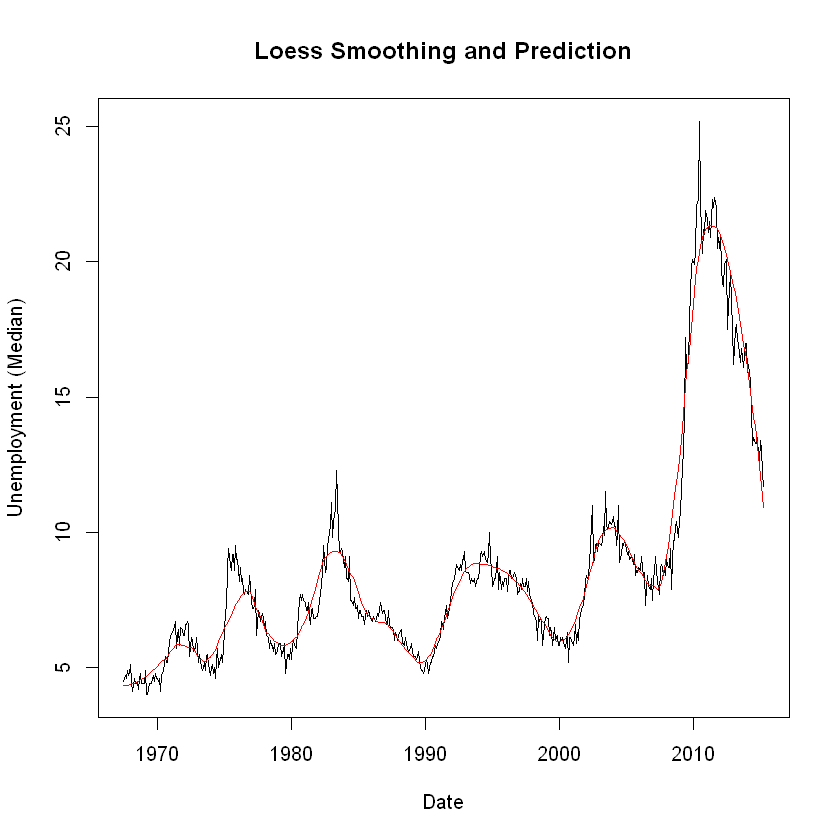

In [424]:
loessbest <- loess(uempmed ~ index, data=economics[-test,], span=start/200, degree=2)
smoothed <- predict(loessbest) 
xx=economics
plot(xx$uempmed, x=xx$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(y=smoothed, x=economics[-test,]$date, col="red")

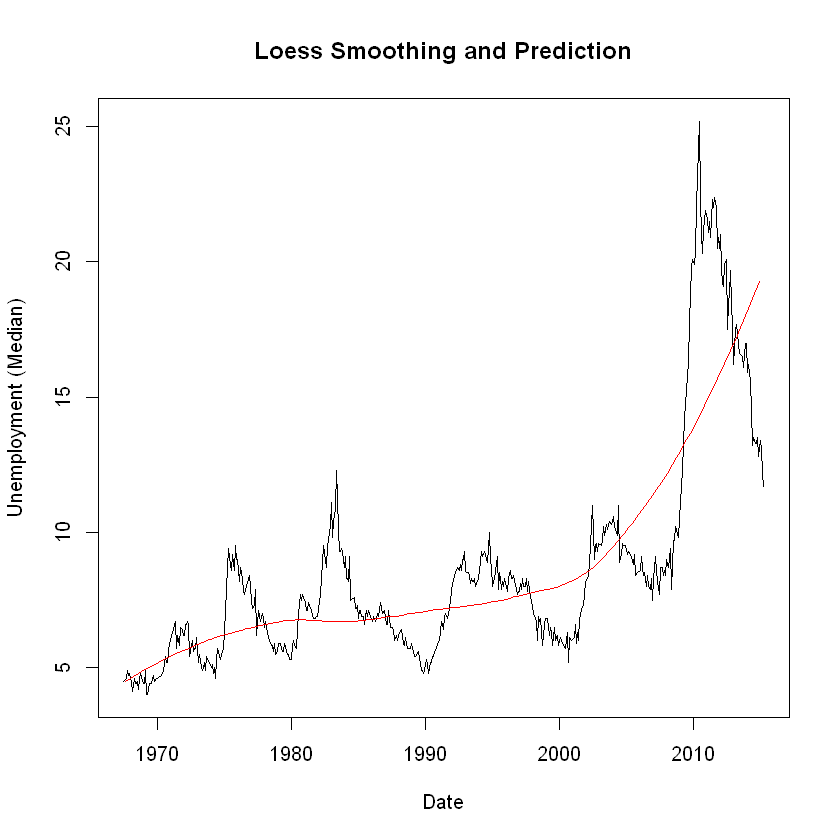

In [419]:
loessbest <- loess(uempmed ~ index, data=economics[-test,], span=start/200, degree=2)
smoothed <- predict(loessbest) 
xx=economics[test,]
plot(xx$uempmed, x=xx$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(y=smoothed, x=economics[-test,]$date, col="red")

In [425]:
test=economics[economics$index>100 & economics$index<200,'index']

In [ ]:
test=test[[1]]

In [ ]:
economics[test,]

In [426]:
nrow(economics[-test,])
nrow(economics[test,])
start <- 1E12
index=0
for (x in 4:100){
  loessMod <- loess(uempmed ~ index, data=economics[-test,], span=x/200, degree=1)
  dif<-predict(loessMod, newdata = economics[test,])-economics[test,'uempmed']
  sse<-sum(dif^2,na.rm=T)
if (sse<start){
    start <- sse
    index <- x
}}
start
index

ERROR: Error in `[.default`(X[[i]], ...): invalid subscript type 'list'


In [ ]:
loessbest <- loess(uempmed ~ index, data=economics[-test,], span=start/200, degree=2)
smoothed <- predict(loessbest) 
xx=economics[test,]
plot(xx$uempmed, x=xx$date, type="l", main="Loess Smoothing and Prediction", xlab="Date", ylab="Unemployment (Median)")
lines(y=smoothed, x=economics[-test,]$date, col="red")

In [ ]:
e

In [427]:
load("Downloads/CBMenTextTables.rda")

In [428]:
menTables$`1999`

[1] ""                                                                          
   [2] "PLACE DIV /TOT  NAME                  AG HOMETOWN           TIME    PACE  "
   [3] "===== ========= ===================== == ================== ======= ===== "
   [4] "    1    1/1584 Worku Bikila          28 Ethiopia             46:59  4:42 "
   [5] "    2    2/1584 Lazarus Nyakeraka     24 Kenya                47:01  4:43 "
   [6] "    3    3/1584 James Kariuki         27 Kenya                47:03  4:43 "
   [7] "    4    4/1584 William Kiptum        28 Kenya                47:07  4:43 "
   [8] "    5    5/1584 Joseph Kimani         26 Kenya                47:31  4:46 "
   [9] "    6    6/1584 Josphat Machuka       25 Kenya                47:33  4:46 "
  [10] "    7    7/1584 Julius Randich        26 Kenya                47:37  4:46 "
  [11] "    8    8/1584 Leonid Shvetsov       30 Russia               49:10  4:55 "
  [12] "    9    9/1584 Reuben Chesang        38 Kenya                49:22  4:57 "
  [13] "   10   10/1584 Daniel Kihara         30 Kenya                49:23  4:57 "
  [14] "   11   11/1584 Kibet Cherop          24 Kenya                49:26  4:57 "
  [15] "   12   12/1584 Ben Kimondieu         21 Kenya                49:37  4:58 "
  [16] "   13   13/1584 Jacob Kirua           23 Kenya                50:05  5:01 "
  [17] "   14   14/1584 Simon Cherogony       27 Kenya                50:17  5:02 "
  [18] "   15   15/1584 Eric Morrison         28 Lakewood CO          50:35  5:04 "
  [19] "   16   16/1584 Mark Gilmore          31 Columbia MD          50:40  5:04 "
  [20] "   17   17/1584 Phillippe Rolly       26 France               51:00  5:06 "
  [21] "   18   18/1584 Jason Bodnar          28 Davie FL             51:15  5:08 "
  [22] "   19   19/1584 Bernard Kitur         27 Aurora CO            51:17  5:08 "
  [23] "   20   20/1584 Todd Reeser           25 Canandaigua NY       51:42  5:11 "
  [24] "   21   21/1584 Chris Chattin         35 Columbia MD          52:22  5:15 "
  [25] "   22   22/1584 Andrew Klemas         35 Falls Church VA      52:25  5:15 "
  [26] "   23   23/1584 Gerry Clapper         37 Columbia MD          52:27  5:15 "
  [27] "   24   24/1584 Dave Berardi          38 Baltimore MD         52:29  5:15 "
  [28] "   25   25/1584 Gary O'donnell        26 Arlington VA         52:32  5:16 "
  [29] "   26   26/1584 Rob Magin             28 Gaithersburg MD      52:40  5:16 "
  [30] "   27   27/1584 Luis Del Aguila       29 State College PA     52:57  5:18 "
  [31] "   28   28/1584 Robert Walker         31 Silver Spring MD     53:24  5:21 "
  [32] "   29    1/327  Bill Rodgers          51 Sherborn MA          54:03  5:25 "
  [33] "   30   29/1584 Mark Hoon             34 Kensington MD        54:13  5:26 "
  [34] "   31   30/1584 Daniel Wallace        33 Arlington VA         54:16  5:26 "
  [35] "   32    1/534  Charlie Andrews       41 Rochester NY         54:18  5:26 "
  [36] "   33   31/1584 Jon Sushinsky         25 Bethesda MD          54:28  5:27 "
  [37] "   34    2/534  Anthony Basile        40 Columbia MD          54:28  5:27 "
  [38] "   35   32/1584 Mark Thompson         30 Alexandria VA        54:30  5:27 "
  [39] "   36   33/1584 Patrick Reed          29 Annapolis MD         54:43  5:29 "
  [40] "   37   34/1584 Anthony Belber        26 Washington DC        54:55  5:30 "
  [41] "   38   35/1584 Todd Martin           29 Arlington VA         54:55  5:30 "
  [42] "   39   36/1584 David Mead            30 Bethesda MD          54:57  5:30 "
  [43] "   40   37/1584 Patrick Schooley      28 Arlington VA         54:59  5:30 "
  [44] "   41    1/432  Chuck Moeser          47 Sterling VA          55:11  5:32 "
  [45] "   42   38/1584 Matt Boyd             28 Fredericksburg VA    55:17  5:32 "
  [46] "   43   39/1584 Mike Wardian          24 Mclean VA            55:27  5:33 "
  [47] "   44   40/1584 Trey Cassidy          30 Silver Spring MD     55:30  5:33 "
  [48] "   45   41/1584 Daniel Holland        29 Philad

In [ ]:
els=menTables$`1999`
els[1:10]

els2011 = menTables$`2011`
els2011[1:10]

eqIndex = grep("^===", els)
eqIndex

first3 = substr(els, 1, 3)
which(first3 == "===")

spacerRow = els[eqIndex]
headerRow = els[eqIndex - 1]
body = els[ -(1:eqIndex) ]

headerRow = tolower(headerRow)

ageStart = regexpr("ag", headerRow)
ageStart


In [429]:

extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}
selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
         },
         headerRow = headerRow, searchLocs = searchLocs )
}
         findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [430]:
extractVariables(menTables$`1999`)

In [431]:
a<-data.frame(extractVariables(menTables$`1999`))
b<-data.frame(extractVariables(menTables$`2000`))
c<-data.frame(extractVariables(menTables$`2001`))
d<-data.frame(extractVariables(menTables$`2002`))
e<-data.frame(extractVariables(menTables$`2003`))
f<-data.frame(extractVariables(menTables$`2004`))
g<-data.frame(extractVariables(menTables$`2005`))
h<-data.frame(extractVariables(menTables$`2006`))
i<-data.frame(extractVariables(menTables$`2007`))
j<-data.frame(extractVariables(menTables$`2008`))
k<-data.frame(extractVariables(menTables$`2009`))
l<-data.frame(extractVariables(menTables$`2010`))
m<-data.frame(extractVariables(menTables$`2011`))
n<-data.frame(extractVariables(menTables$`2012`))

In [432]:
a$year<-1999
b$year<-2000
c$year<-2001
d$year<-2002
e$year<-2003
f$year<-2004
g$year<-2005
h$year<-2006
i$year<-2007
j$year<-2008
k$year<-2009
l$year<-2010
m$year<-2011
n$year<-2012

In [433]:
a

name,home,ag,gun,net,time,year
Worku Bikila,Ethiopia,28,NA,NA,46:59,1999
Lazarus Nyakeraka,Kenya,24,NA,NA,47:01,1999
James Kariuki,Kenya,27,NA,NA,47:03,1999
William Kiptum,Kenya,28,NA,NA,47:07,1999
Joseph Kimani,Kenya,26,NA,NA,47:31,1999
Josphat Machuka,Kenya,25,NA,NA,47:33,1999
Julius Randich,Kenya,26,NA,NA,47:37,1999
Leonid Shvetsov,Russia,30,NA,NA,49:10,1999
Reuben Chesang,Kenya,38,NA,NA,49:22,1999
Daniel Kihara,Kenya,30,NA,NA,49:23,1999


In [434]:

b

name,home,ag,gun,net,time,year
Reuben Cheruiyot,Kenya,26,46:07,46:06,NA,2000
Joseph Kimani,Kenya,27,46:10,46:08,NA,2000
John Korir,Kenya,24,46:19,46:19,NA,2000
Domenic Kirui,Kenya,32,46:21,46:19,NA,2000
Joshua Chelanga,Kenya,26,46:25,46:24,NA,2000
David Makori,Kenya,26,46:57,46:56,NA,2000
Philip Kurui,Kenya,26,47:31,47:31,NA,2000
Felix Limo,Kenya,19,47:31,47:31,NA,2000
Jimmy Hearld,Louisville KY,32,47:59,47:56,NA,2000
Keith Dowling,Boulder CO,30,48:01,48:00,NA,2000


In [435]:
nrow(b)

[1] 3017

In [436]:
b=b[-3017,]

In [ ]:
b

In [437]:
b$time<-b$net

In [438]:
b

name,home,ag,gun,net,time,year
Reuben Cheruiyot,Kenya,26,46:07,46:06,46:06,2000
Joseph Kimani,Kenya,27,46:10,46:08,46:08,2000
John Korir,Kenya,24,46:19,46:19,46:19,2000
Domenic Kirui,Kenya,32,46:21,46:19,46:19,2000
Joshua Chelanga,Kenya,26,46:25,46:24,46:24,2000
David Makori,Kenya,26,46:57,46:56,46:56,2000
Philip Kurui,Kenya,26,47:31,47:31,47:31,2000
Felix Limo,Kenya,19,47:31,47:31,47:31,2000
Jimmy Hearld,Louisville KY,32,47:59,47:56,47:56,2000
Keith Dowling,Boulder CO,30,48:01,48:00,48:00,2000


In [ ]:
data<-rbind(a,b)

In [ ]:
data

In [441]:
c$time<-c$net
c<-c[-nrow(c),]
c

name,home,ag,gun,net,time,year
John KORIR,Kenya,26,46:12,46:12,46:12,2001
Reuben CHERUIYOT,Kenya,27,46:13,46:11,46:11,2001
Evans RUTTO,Kenya,23,46:26,46:26,46:26,2001
Enock MITEI,Kenya,21,46:39,46:37,46:37,2001
Felix LIMO,Kenya,21,46:41,46:40,46:40,2001
El Arbi KHATTABI,Morocco,34,46:49,46:49,46:49,2001
Fita BAYESA,Ethiopia,28,46:53,46:51,46:51,2001
Gabriel MUCHIRI,Kenya,22,47:01,46:59,46:59,2001
Daniel GACHARA,Kenya,28,47:10,47:10,47:10,2001
Christopher GRAFF,Washington DC,25,47:22,47:19,47:19,2001


In [442]:
d$time<-d$net
d<-d[-(nrow(d)),]

In [443]:
f$time<-f$net
f

name,home,ag,gun,net,time,year
Nelson Kiplagat,KEN,25,48:12,48:12,48:12,2004
Samuel Ndereba,KEN,25,48:14,48:12,48:12,2004
Reuben Chebii,KEN,20,48:17,48:17,48:17,2004
William Naranjo,COL,25,48:18,48:17,48:17,2004
Masato Ando,JAP,25,48:36,48:34,48:34,2004
Tsuyoshi Nakano,JAP,25,48:49,48:48,48:48,2004
Kazuo Ictani,JAP,25,49:15,49:14,49:14,2004
Mindaugas Pukstas,LIT,25,49:21,49:20,49:20,2004
Peter Tanui,KEN,29,49:33,49:33,49:33,2004
Wilson Komen,KEN,27,49:42,49:40,49:40,2004


In [444]:
g

name,home,ag,gun,net,time,year
John K Korir,Kenya,29,46:56,46:54,NA,2005
Reuben Chebii,Kenya,22,46:58,46:57,NA,2005
Ernest Meli Kemeli,Kenya,20,47:05,47:04,NA,2005
Gilbert Okari,Kenya,26,47:16,47:16,NA,2005
John C Korir,Kenya,23,47:32,47:32,NA,2005
Paul Koech,Kenya,35,47:49,47:47,NA,2005
Andrew Letherby,Australia,31,47:52,47:52,NA,2005
Wilberforce Talel,Kenya,25,47:54,47:54,NA,2005
Samuel Ndereba,Kenya,28,47:56,47:55,NA,2005
John Itati,Kenya,31,48:11,48:11,NA,2005


In [446]:
nrow(g)
rem<-c(4325,4326,4327)
g<-g[-rem,]
g$time<-g$net
g

[1] 4327

name,home,ag,gun,net,time,year
John K Korir,Kenya,29,46:56,46:54,46:54,2005
Reuben Chebii,Kenya,22,46:58,46:57,46:57,2005
Ernest Meli Kemeli,Kenya,20,47:05,47:04,47:04,2005
Gilbert Okari,Kenya,26,47:16,47:16,47:16,2005
John C Korir,Kenya,23,47:32,47:32,47:32,2005
Paul Koech,Kenya,35,47:49,47:47,47:47,2005
Andrew Letherby,Australia,31,47:52,47:52,47:52,2005
Wilberforce Talel,Kenya,25,47:54,47:54,47:54,2005
Samuel Ndereba,Kenya,28,47:56,47:55,47:55,2005
John Itati,Kenya,31,48:11,48:11,48:11,2005


In [447]:
h

name,home,ag,gun,net,time,year
Gilbert Okari,Kenya 47:24,27,47:25,Kenya 47:24,NA,2006
Samuel Ndereba,Kenya 47:34,29,47:35,Kenya 47:34,NA,2006
Rueben Kibet Chebii,Kenya 47:38,23,47:39,Kenya 47:38,NA,2006
Kazuo Ietani,Japan 47:39,28,47:39,Japan 47:39,NA,2006
Wilson Komen,Kenya 47:58,28,47:58,Kenya 47:58,NA,2006
Matt Downin,United States 48:42,29,48:43,United States 48:42,NA,2006
Chris Graff,United States 48:54,30,48:55,United States 48:54,NA,2006
Worku Beyi,Ethiopia 48:57,19,48:57,Ethiopia 48:57,NA,2006
Mindaugas Pukstas,Lithuania 49:20,27,49:20,Lithuania 49:20,NA,2006
Michitaka Hosokawa,Japan 49:26,29,49:26,Japan 49:26,NA,2006


In [451]:
unlist(strsplit(as.character(h[1,'home']),'\\s+'))[1]

[1] "Kenya"

In [452]:
my_f<-function (x){
    temp<-unlist(strsplit(as.character(x),"\\s+"))
    l<-length(temp)
    if (l > 2){
        return(paste(temp[1:(l-1)],collapse=" "))
    }
    else{return(temp[1])}
}

In [453]:
h$home=sapply(h[,'home'],my_f)


In [454]:
my_f2<-function (x){
    temp<-unlist(strsplit(as.character(x),"\\s+"))
    l<-length(temp)
    return(temp[l])}

name,home,ag,gun,net,time,year
Gilbert Okari,Kenya,27,47:25,Kenya 47:24,NA,2006
Samuel Ndereba,Kenya,29,47:35,Kenya 47:34,NA,2006
Rueben Kibet Chebii,Kenya,23,47:39,Kenya 47:38,NA,2006
Kazuo Ietani,Japan,28,47:39,Japan 47:39,NA,2006
Wilson Komen,Kenya,28,47:58,Kenya 47:58,NA,2006
Matt Downin,United States,29,48:43,United States 48:42,NA,2006
Chris Graff,United States,30,48:55,United States 48:54,NA,2006
Worku Beyi,Ethiopia,19,48:57,Ethiopia 48:57,NA,2006
Mindaugas Pukstas,Lithuania,27,49:20,Lithuania 49:20,NA,2006
Michitaka Hosokawa,Japan,29,49:26,Japan 49:26,NA,2006


In [455]:
h$net=sapply(h[,'net'],my_f2)

In [456]:
h

name,home,ag,gun,net,time,year
Gilbert Okari,Kenya,27,47:25,47:24,NA,2006
Samuel Ndereba,Kenya,29,47:35,47:34,NA,2006
Rueben Kibet Chebii,Kenya,23,47:39,47:38,NA,2006
Kazuo Ietani,Japan,28,47:39,47:39,NA,2006
Wilson Komen,Kenya,28,47:58,47:58,NA,2006
Matt Downin,United States,29,48:43,48:42,NA,2006
Chris Graff,United States,30,48:55,48:54,NA,2006
Worku Beyi,Ethiopia,19,48:57,48:57,NA,2006
Mindaugas Pukstas,Lithuania,27,49:20,49:20,NA,2006
Michitaka Hosokawa,Japan,29,49:26,49:26,NA,2006


In [457]:
j

name,home,ag,gun,net,time,year
Ridouane Harroufi,Morocco,26,NA,NA,46:14,2008
Nicholas Kamakya,Kenya,23,NA,NA,46:15,2008
Sammy Kipketer,Kenya,26,NA,NA,46:20,2008
Charles Munyeki,Kenya,21,NA,NA,46:22,2008
John Yuda,Tanzania,28,NA,NA,46:22,2008
Festus Langat,Kenya,22,NA,NA,46:22,2008
John Korir,Kenya,32,NA,NA,46:30,2008
Samuel Ndereba,Kenya,31,NA,NA,46:38,2008
MacDonald Ondara,Kenya,23,NA,NA,47:36,2008
Dagne Alemu,Ethiopia,27,NA,NA,48:10,2008


In [459]:
read.delim(file="./Downloads/class-example2.txt",sep="\t")

Place,Div..Tot,Num,Name,Ag,Hometown,Gun.Tim,Net.Tim,Pace
1,1/1420,1,Ridouane Harroufi,27,Morocco,45:56,45:56#,4:36
2,1/62,9,Feyisa Liesa,19,Ethiopia,45:58,45:58#,4:36
3,1/1271,13,Silas Sang,31,Kenya,45:59,45:59#,4:36
4,2/1420,29,Karim El Mabchour,26,Morocco,46:00,46:00#,4:36
5,3/1420,81,Stephen Chemlany,26,Kenya,46:06,46:06#,4:37
6,1/399,83,Cosmas Koech Kimuati,23,Kenya,46:08,46:08#,4:37
7,2/399,17,Philemon Terer,24,Kenya,46:28,46:28#,4:39
8,2/1271,19,Samuel Ndereba,32,Kenya,46:58,46:58#,4:42
9,4/1420,7,Kiplimo Kimutai,27,Kenya,47:03,47:03#,4:43
10,1/1037,25,Lee Troop,36,Australia,47:43,47:43#,4:47


In [458]:
k

name,home,ag,gun,net,time,year
Â Â Â Â Â 1 Ridouane,roccoÂ,roccoÂ,NA,NA,NA,2009
Â Â Â Â Â Â 9 Feyisa,19 Et,19 Et,NA,NA,NA,2009
Â Â Â Â 13 Silas San,31 Ken,31 Ken,NA,NA,NA,2009
Â Â Â Â 29 Karim El,occoÂ Â,occoÂ Â,NA,NA,NA,2009
Â Â Â Â 81 Stephen C,nyaÂ Â,nyaÂ Â,NA,NA,NA,2009
Â Â Â Â Â 83 Cosmas K,Â Â Â Â,Â Â Â Â,NA,NA,NA,2009
Â Â Â Â Â 17 Philemon,KenyaÂ,KenyaÂ,NA,NA,NA,2009
Â Â Â Â 19 Samuel Nd,KenyaÂ,KenyaÂ,NA,NA,NA,2009
Â Â Â Â Â 7 Kiplimo,KenyaÂ,KenyaÂ,NA,NA,NA,2009
Â Â Â Â 25 Lee TroopÂ,36 Aus,36 Aus,NA,NA,NA,2009


In [ ]:
m

In [ ]:
n

In [ ]:
h

In [ ]:
unlist(strsplit(as.character(h[1,'home']),"\\s+"))[1]

In [ ]:
my_f<-function (x){
    temp<-unlist(strsplit(as.character(x),"\\s+"))
    l<-length(temp)
    if (l > 2){
        return(paste(temp[1:(l-1)],collapse=" "))
    }
    else{return(temp[1])}
}


Warning message in `[<-.factor`(`*tmp*`, ri, value = list("47:24", "47:34", "47:38", :
"invalid factor level, NA generated"

Warning message:
"file 'data.RDA' has magic number 'X'
  Use of save versions prior to 2 is deprecated"

ERROR: Error in load("data.RDA"): bad restore file magic number (file may be corrupted) -- no data loaded
